In [248]:
# !pip install scikit-fuzzy --quiet

In [249]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [250]:
preco = ctrl.Antecedent(np.arange(40000, 100000, 1), 'preco')
consumo = ctrl.Antecedent(np.arange(11, 18, 1), 'consumo')

beneficio = ctrl.Consequent(np.arange(0, 11, 0.5), 'beneficio')

In [251]:
preco.automf(number=3, names=['baixo', 'medio', 'alto'])
consumo.automf(number=3, names=['alto', 'medio', 'baixo'])

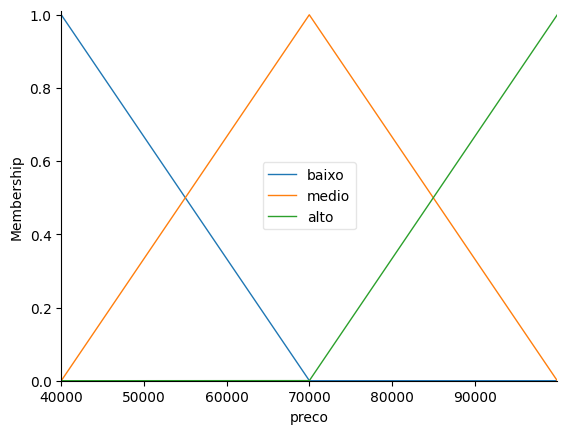

In [252]:
preco.view()

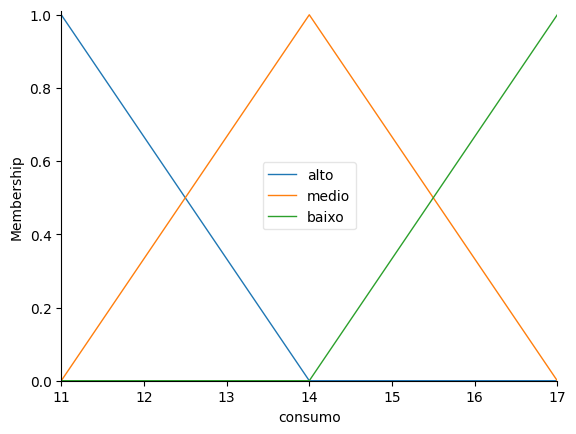

In [253]:
consumo.view()

In [254]:
# consumo = ctrl.Antecedent(np.arange(11, 17, 1), 'consumo')
# consumo.automf(number=3, names=['alto', 'medio', 'baixo'])
# consumo.view()

# O gráfico fica quebrado pois está de uma em uma unidade

In [255]:
# consumo = ctrl.Antecedent(np.arange(11, 17, 0.01), 'consumo')
# consumo.automf(number=3, names=['alto', 'medio', 'baixo'])
# consumo.view()

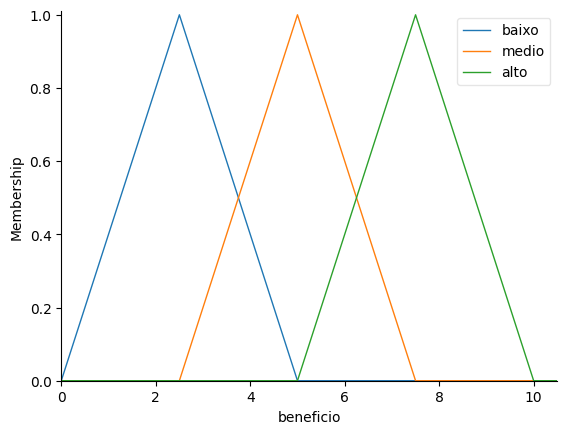

In [256]:
beneficio['baixo'] = fuzz.trimf(beneficio.universe, [0, 2.5, 5])
beneficio['medio'] = fuzz.trimf(beneficio.universe, [2.5, 5, 7.5])
beneficio['alto'] = fuzz.trimf(beneficio.universe, [5, 7.5, 10])

# universo de discurso
beneficio.view()

In [257]:
# beneficio['baixo'] = fuzz.trimf(beneficio.universe, [0, 0, 5])
# beneficio['medio'] = fuzz.trimf(beneficio.universe, [2.5, 5, 7.5])
# beneficio['alto'] = fuzz.trimf(beneficio.universe, [5, 7.5, 10])

# beneficio.view()

In [258]:
regra1 = ctrl.Rule(preco['baixo'] | consumo['baixo'], beneficio['alto'])
regra2 = ctrl.Rule(preco['baixo'] | consumo['medio'], beneficio['medio'])
regra3 = ctrl.Rule(preco['medio'] | consumo['baixo'], beneficio['medio'])
regra4 = ctrl.Rule(preco['medio'] | consumo['medio'], beneficio['medio'])
regra5 = ctrl.Rule(preco['medio'] | consumo['alto'], beneficio['medio'])
regra6 = ctrl.Rule(preco['alto'] | consumo['medio'], beneficio['medio'])
regra7 = ctrl.Rule(preco['alto'] | consumo['alto'], beneficio['baixo'])
regra8 = ctrl.Rule(preco['baixo'] | consumo['alto'], beneficio['medio'])
regra9 = ctrl.Rule(preco['alto'] | consumo['baixo'], beneficio['medio'])

In [259]:
recomendacao_compra = ctrl.ControlSystem([regra1, regra2, regra3,
                                          regra4, regra5, regra6,
                                          regra7, regra8, regra9])

recomendacao = ctrl.ControlSystemSimulation(recomendacao_compra)

In [260]:
recomendacao.input['preco'] = 50000
recomendacao.input['consumo'] = 16

recomendacao.compute()

6.25


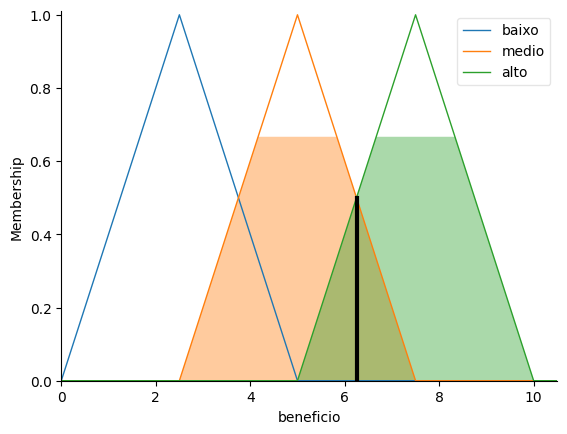

In [264]:
print(recomendacao.output['beneficio'])
beneficio.view(sim = recomendacao)